<a href="https://colab.research.google.com/github/Untick/insects_detection/blob/main/Anikeev%20Artem/YOLOv8_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA_%D0%BB%D0%B8%D1%81%D1%82%D1%8C%D0%B5%D0%B2_%D1%81_%D0%B4%D1%8B%D1%80%D0%BA%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
import os
from IPython.display import Image

from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/stajirovka2'
files = os.listdir(directory_path)
# Выводим имена всех файлов
for file_name in files:
  print(file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cut1_m1.mp4
Frames
cut2_m2.mp4
cut5_m2.mp4
zoomcam3.mp4
.ipynb_checkpoints
Images
Data
Data_leafs


In [ ]:
ROOT_DIR = "/content/drive/MyDrive/stajirovka2/Data_leafs"

In [ ]:
# Обучение модели

model = YOLO("yolov8m.yaml")

result = model.train(data=os.path.join(ROOT_DIR, "my_config.yaml"), epochs=300)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

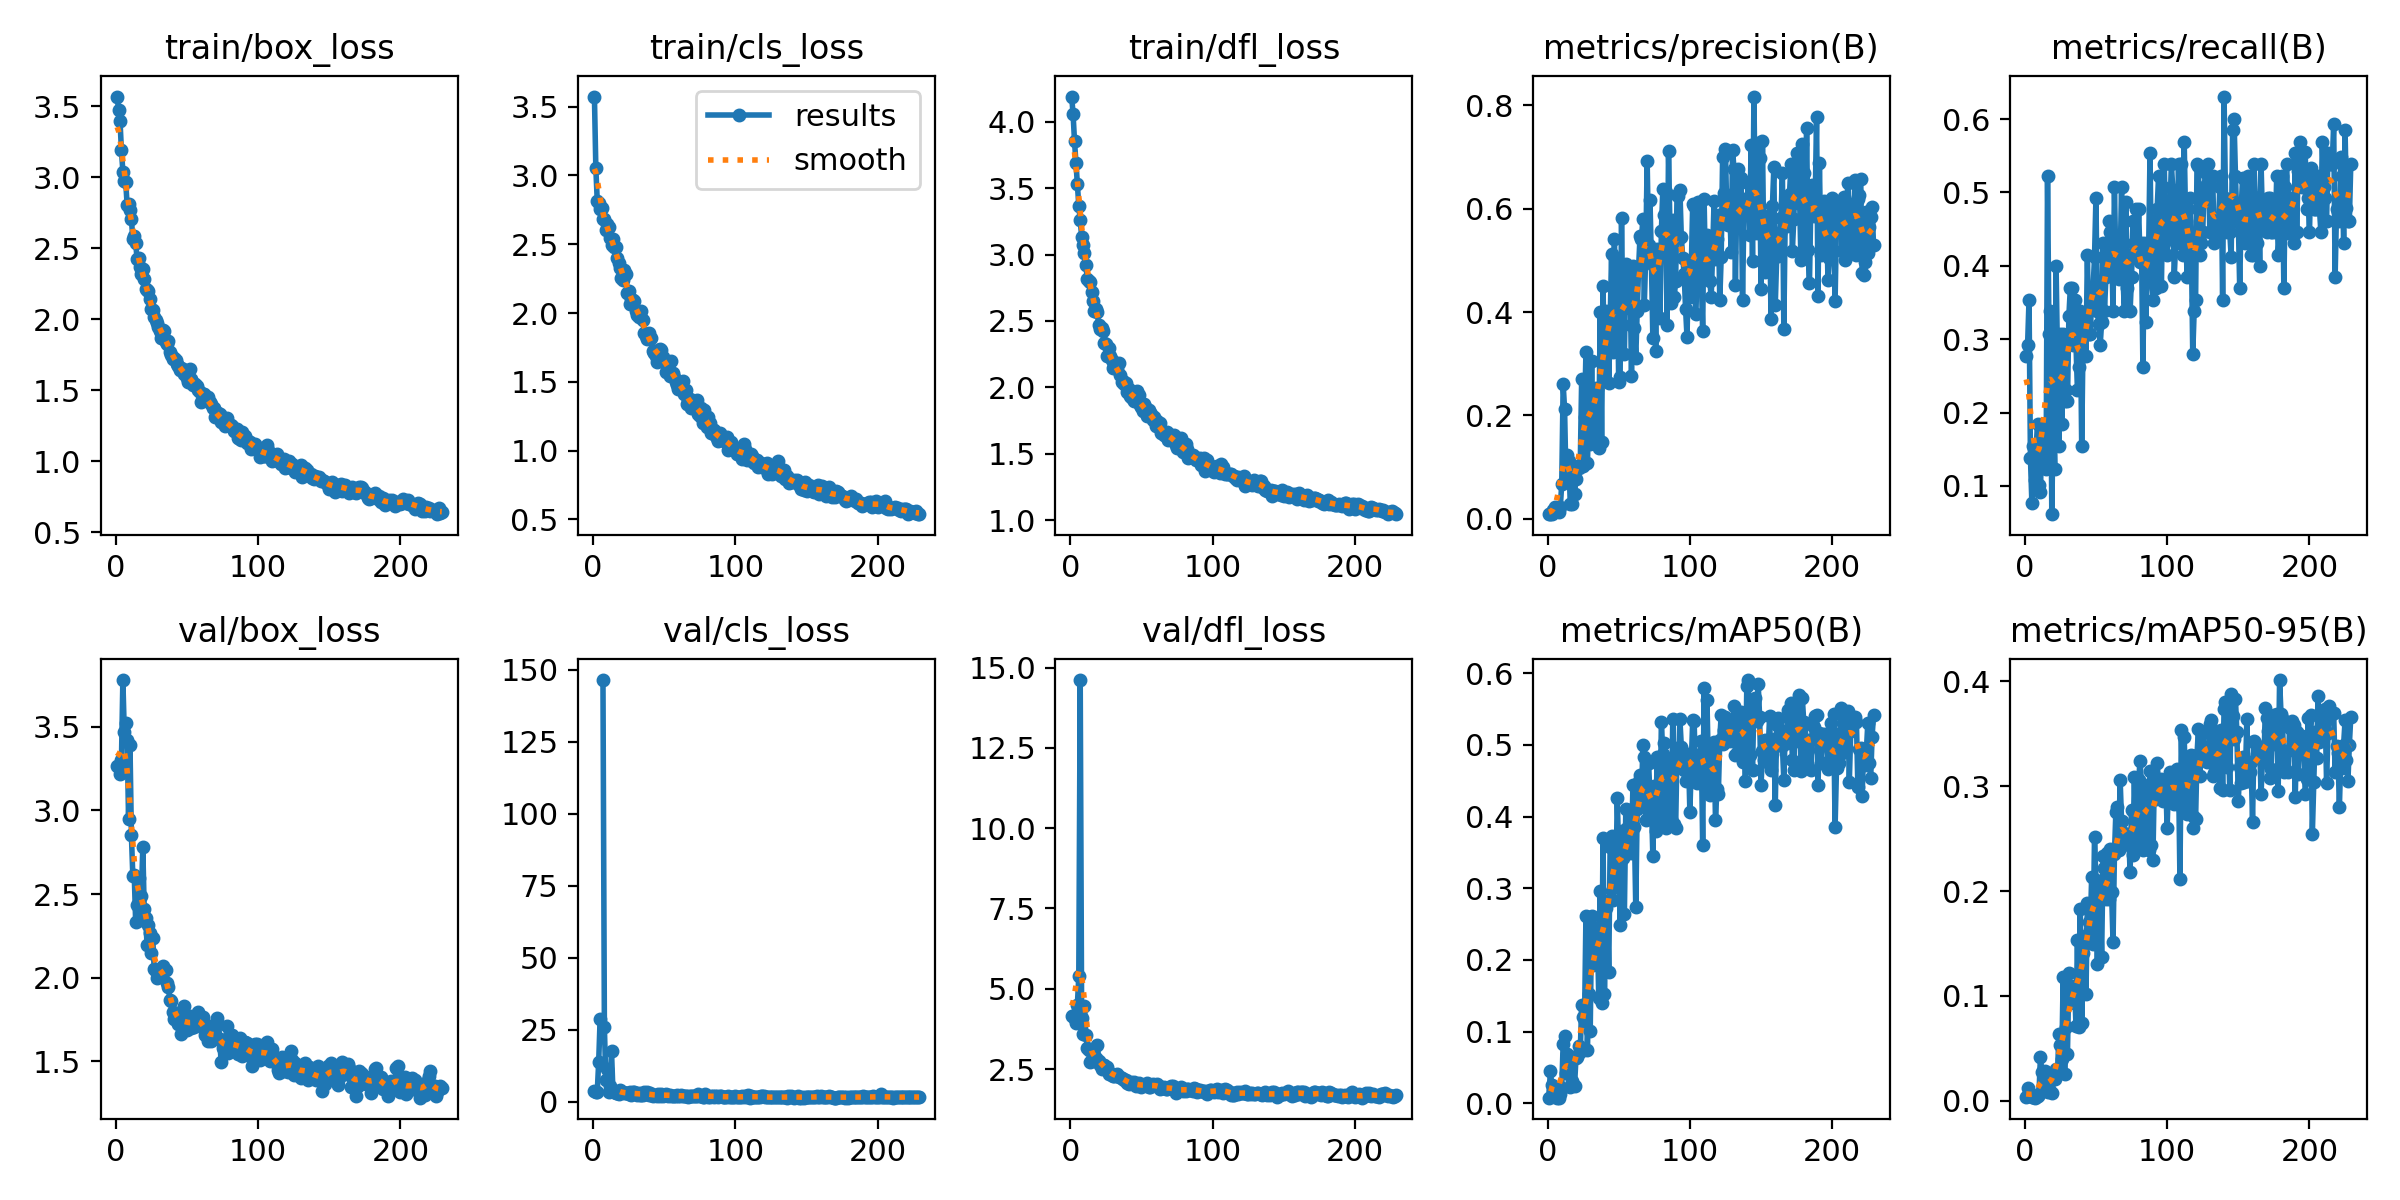

In [ ]:
# Посмотреть итог обучения
from IPython.display import Image
Image(filename='/content/runs/detect/train3/results.png', height=600)

In [ ]:
# Сохранение обученной модели

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/detect/train3/'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka2/Data_leafs/runs/detect/train'

# Копирование файла на Google Диск
#shutil.copytree(source_folder, destination_folder)

# Команда для копирования папки
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka2/Data_leafs/runs/detect/train'

In [1]:
# Восстановление последней модели
# Нужно подставить путь к своим сохраненным весам

model_path = '/content/drive/MyDrive/stajirovka2/Data_leafs/runs/detect/train/weights/last.pt'
model = YOLO(model_path)

NameError: ignored

In [ ]:
# Все что определилось с вероятностью conf=0.5 приняли решение что будем показывать

model.val(conf=0.5)
model.val(data=os.path.join(ROOT_DIR, "my_config.yaml"), conf=0.5)

Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/stajirovka2/Data/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]
                   all         20        306       0.92      0.412      0.674      0.405
Speed: 8.0ms preprocess, 34.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/stajirovka2/Data/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6ab6323880>
fitness: 0.43178600131608924
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.40486])
names: {0: 'hole'}
plot: True
results_dict: {'metrics/precision(B)': 0.9197080291970803, 'metrics/recall(B)': 0.4117647058823529, 'metrics/mAP50(B)': 0.674083520117856, 'metrics/mAP50-95(B)': 0.4048640547825596, 'fitness': 0.43178600131608924}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 7.8534722328186035, 'inference': 14.4697904586792, 'loss': 0.003635883331298828, 'postprocess': 1.5405535697937012}

In [ ]:
import cv2

In [ ]:
# Предикт на картинке

results = model.predict(source="/content/drive/MyDrive/stajirovka2/Data/images/test/instecs on leaves_001 (1).jpg", conf=0.40, save=True, show=True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/drive/MyDrive/stajirovka2/Data/images/test/instecs on leaves_001 (1).jpg: 640x640 9 holes, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


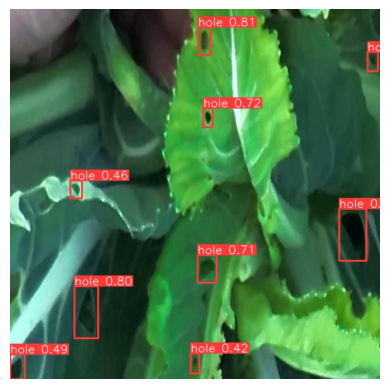

In [ ]:
import matplotlib.pyplot as plt

# Берем то что выше вывелось и подставляем сюда:
image = cv2.imread('/content/runs/detect/predict2/instecs on leaves_001 (1).jpg')

# отображение изображения
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Копируем из гуглдиска в коллаб

import shutil

# Путь к исходному файлу
source_folder = '/content/drive/MyDrive/stajirovka2/Data_leafs/video_for_test/cut5_m2.mp4'

# Путь к целевой папке на Google Диске
destination_folder = '/content/sample_data/'

# Копирование файла на Google Диск
#shutil.copy(source_path, target_path)
shutil.copy(source_folder, destination_folder)

'/content/sample_data/cut5_m2.mp4'

In [ ]:
# Вариант Андрея как делать предикт с коллаба

model.predict(source="/content/sample_data/cut5_m2.mp4", save=True, show=False)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/531) /content/sample_data/cut5_m2.mp4: 384x640 3 bad_leafs, 86.8ms
video 1/1 (2/531) /content/sample_data/cut5_m2.mp4: 384x640 3 bad_leafs, 25.9ms
video 1/1 (3/531) /content/sample_data/cut5_m2.mp4: 384x640 3 bad_leafs, 26.3ms
video 1/1 (4/531) /content/sample_data/cut5_m2.mp4: 384x640 3 bad_leafs, 26.0ms
video 1/1 (5/531) /content/sample_data/cut5_m2.mp4: 384x640 3 bad_leafs, 26.2ms
video 1/1 (6/531) /content/sample_data/cut5_m2.mp4: 384x

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bad_leaf'}
 orig_img: array([[[145, 165, 138],
         [148, 168, 141],
         [156, 176, 149],
         ...,
         [117, 133, 108],
         [117, 133, 108],
         [117, 133, 108]],
 
        [[138, 158, 131],
         [138, 158, 131],
         [136, 156, 129],
         ...,
         [117, 133, 108],
         [117, 133, 108],
         [117, 133, 108]],
 
        [[122, 142, 115],
         [119, 139, 112],
         [114, 134, 107],
         ...,
         [117, 133, 108],
         [117, 133, 108],
         [117, 133, 108]],
 
        ...,
 
        [[ 23,  55,  34],
         [ 23,  55,  34],
         [ 23,  55,  34],
         ...,
         [ 77,  92,  61],
         [ 77,  92,  61],
         [ 77,  92,  61]],
 
        [[ 23,  55,  34],
         [ 23,  55,  34],
         [ 23,  55,  34],
         ...,
         [ 77,  92,  61],
 

In [ ]:
# Копируем из коллаба в гуглдиск

import shutil

# Путь к исходному файлу
source_folder = '/content/runs/detect/predict2/cut5_m2.avi'

# Путь к целевой папке на Google Диске
destination_folder = '/content/drive/MyDrive/stajirovka2/Data_leafs/video_for_test_results/'

# Копирование файла на Google Диск
shutil.copy(source_folder, destination_folder)

'/content/drive/MyDrive/stajirovka2/Data_leafs/video_for_test_results/cut5_m2.avi'